In [21]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import pyro
import pyro.distributions as dist

plt.style.use("seaborn-v0_8")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
pyro.set_rng_seed(0)
torch.manual_seed(0)

In [23]:
N = 100
target_dist = dist.Gamma(5.7, 2)
targets_samples = target_dist.sample((N, ))


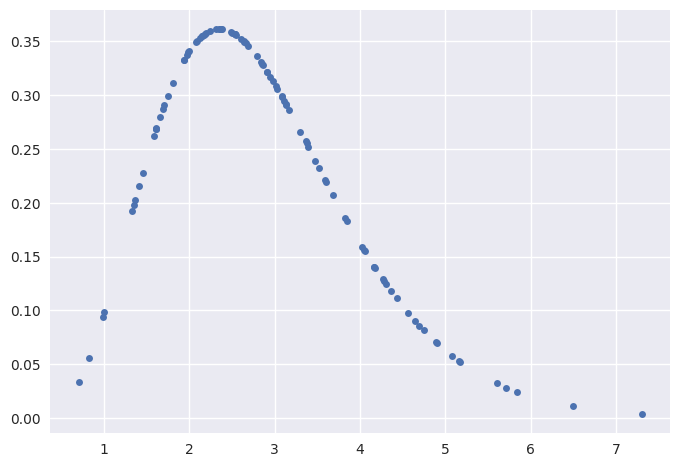

In [24]:
plt.plot(targets_samples, 
         target_dist.log_prob(targets_samples).exp(), 
         "o", markersize=5)

In [25]:
proposal_dist = dist.Gamma(5, 1)
proposal_samples = proposal_dist.sample((N * 2,))

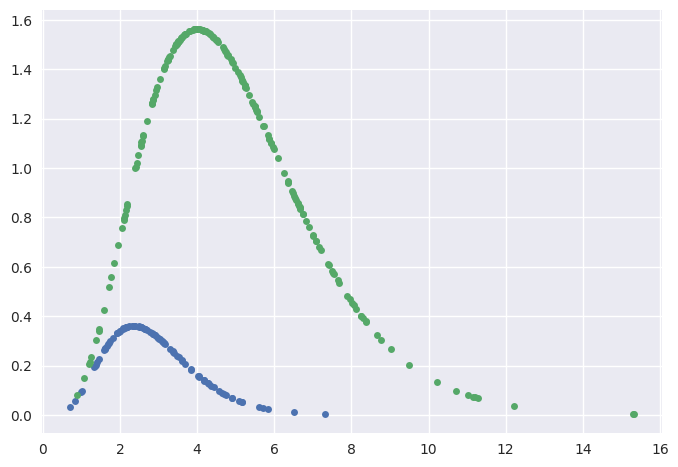

In [26]:
fig, ax = plt.subplots()
plt.plot(targets_samples, 
         target_dist.log_prob(targets_samples).exp(), 
         "o", markersize=5, label='target')
ax.plot(proposal_samples, 
         8* proposal_dist.log_prob(proposal_samples).exp(), 
         "o", markersize=5, label='proposal')

In [27]:
class Proposal:
    
    def __init__(self, prop_dist, scale_factor) -> None:
        self.prop_dist = prop_dist
        self.scale_factor = scale_factor
    
    def sample(self, size=(1,)):
        return self.prop_dist.sample(size)
    
    def prob(self, x):
        return self.scale_factor * self.prop_dist.log_prob(x).exp()
    
    

In [28]:
def rejection_sample(target, proposal, nsamples=1):
    samples = []
    k = 0
    while len(samples) < nsamples:
        x0 = proposal.sample().item()
        u = dist.Uniform(0, proposal.prob(x0)).sample()
        v = target.log_prob(x0).exp()
        if u > v:
            continue
        samples.append(x0)
        k+= 1
    
    return torch.tensor(samples)

In [29]:
rej_samples = rejection_sample(target_dist, Proposal(proposal_dist, 8), 50)

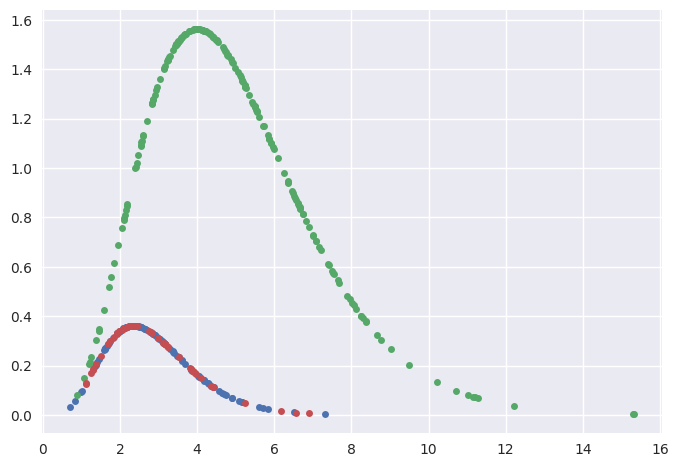

In [30]:
fig, ax = plt.subplots()
plt.plot(targets_samples, 
         target_dist.log_prob(targets_samples).exp(), 
         "o", markersize=5, label='target')
ax.plot(proposal_samples, 
         8* proposal_dist.log_prob(proposal_samples).exp(), 
         "o", markersize=5, label='proposal')

ax.plot(rej_samples, 
         target_dist.log_prob(rej_samples).exp(), 
         "o", markersize=5, label='rejection_samples')